# Loading dados tratados

In [13]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import html
import pandas as pd
import seaborn as sns
from google.colab import files
import os
import pickle as pk

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# <font face="Verdana" size=6 color='#6495ED'>   LFW

*Labeled Faces in the Wild* (LFW) é um banco de dados de fotografias de rostos projetado para estudar o problema do reconhecimento facial. Atualmente, quatro conjuntos diferentes de imagens LFW,  incluindo o original e três tipos diferentes de imagens "alinhadas". De acordo com os pesquisadores, as imagens com alinhamento tipo afunilamento profundo (*deep funneling*) produziram resultados superiores para a maioria dos algoritmos de verificação de rosto em comparação com os outros tipos de imagem. Portanto, o conjunto de dados carregado aqui é essa versão.

<center><img src='https://drive.google.com/uc?export=view&id=1IGeppDQn5xMl8k1uidUjTqahKPT7n0dt' width="400"></center>

<small> Imagem extraída do [link](https://github.com/dribnet/lfw_fuel).

Abaixo, o conjunto de dados de pessoas LFW é carregado. Os principais parâmetros são `min_faces_per_person` e `resize`. O primeiro parâmetro indica o mínimo de imagens que uma pessoa deve ter para ser selecionada para o dataset e o segundo parâmetro indica a proporção na qual a imagem é redimensionada.
```
lfw_people = fetch_lfw_people(resize=1.0)
```

As imagens são $125 \times 94 = 11750$. Você pode, por exemplo,
escolher um `resize` de 0.5, que leva a uma dimensão total de $62\times 47 = 2914$ para cada ponto do espaço (imagem). Além disso, a escolha default  `min_faces_per_person = None` levou a um conjunto de 13233 imagens no total.

In [26]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(resize=1.0)

Perceba com o código abaixo que a variável `lfw_people.images` contém os dados referentes às imagens e a variável `lfw_people.target` contém um número referente à identificação da imagem (0-5748). A conexão entre os números usados na identificação e o nome de cada pessoa é obtida através da variável `lfw_people.target_names`.

A matriz 2D `lfw_people.data` contém o número de linhas equivalente ao número de imagens e o número de colunas equivalente à dimensão (número de características) de cada imagem.

O dataset contém  13233 imagens de dimensões  125 por 94
Portanto, o número de características (dimensão) de cada imagem é 125 x 94 = 11750
Portanto, todos os dados estão resumidos em uma matriz de 13233 linhas por 11750 colunas.

Cada uma das imagens tem um número de identificação. Os números estão armazenados em um vetor de dimensão 13233:
[5360 3434 3807 ... 2175  373 2941]

O número direciona a imagem a uma das 5749 pessoas diferentes existentes no dataset. São elas:
['AJ Cook' 'AJ Lamas' 'Aaron Eckhart' ... 'Zumrati Juma' 'Zurab Tsereteli'
 'Zydrunas Ilgauskas']



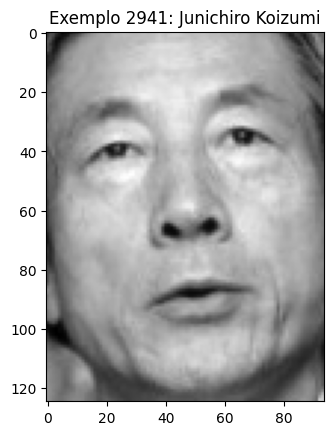

In [27]:
cont_imagens, altura_lfw, largura_lfw = lfw_people.images.shape
n_classes = lfw_people.target_names.shape[0]

print(f'O dataset contém ',cont_imagens, 'imagens de dimensões ', altura_lfw, 'por', largura_lfw)
print(f'Portanto, o número de características (dimensão) de cada imagem é {altura_lfw} x {largura_lfw} = {lfw_people.data.shape[1]}')
print(f'Portanto, todos os dados estão resumidos em uma matriz de {lfw_people.data.shape[0]} linhas por {lfw_people.data.shape[1]} colunas.\n')

print(f'Cada uma das imagens tem um número de identificação. Os números estão armazenados em um vetor de dimensão {lfw_people.target.shape[0]}:')
print(f'{lfw_people.target}\n' )

print(f'O número direciona a imagem a uma das {n_classes} pessoas diferentes existentes no dataset. São elas:')
target_names = lfw_people.target_names
print(f'{target_names}\n')

plt.imshow(lfw_people.images[-1], cmap='gray')
name_ex = lfw_people.target_names[lfw_people.target[-1]]

plt.title('Exemplo '+str(lfw_people.target[-1])+': '+str(name_ex))
plt.show()


Junichiro Koizumi foi um político japonês que serviu como Primeiro-Ministro do Japão de 2001 a 2006. Ele é conhecido por suas políticas reformistas e estilo de liderança carismático. Koizumi nasceu em 8 de janeiro de 1942, em Yokosuka, na província de Kanagawa. Ele ingressou na política seguindo os passos de seu pai e avô, ambos políticos influentes.

In [28]:
for (i,j) in zip(range(len(target_names)),target_names):
  if j == "Roberto Carlos":
    print(i,j)
  if j == "Tony Blair":
    print(i,j)
  if j == "Halle Berry":
    print(i,j)
  if j == "Pele":
    print(i,j)
  if j == "Naomi Campbell":
    print(i,j)
  if j == "Colin Powell":
    print(i,j)
  if j == "Margaret Thatcher":
    print(i,j)
  if j == "Gisele Bundchen":
    print(i,j)
  if j == "Tom Cruise":
    print(i,j)

1047 Colin Powell
1918 Gisele Bundchen
2021 Halle Berry
3486 Margaret Thatcher
4010 Naomi Campbell
4314 Pele
4721 Roberto Carlos
5406 Tom Cruise
5458 Tony Blair


Veja que o dataset é composto das mais diversas faces...

<center><img src='https://drive.google.com/uc?export=view&id=1MqvGqzlLo98WjNkhO9dsAqTGH4HN8x8o' width="900"></center>

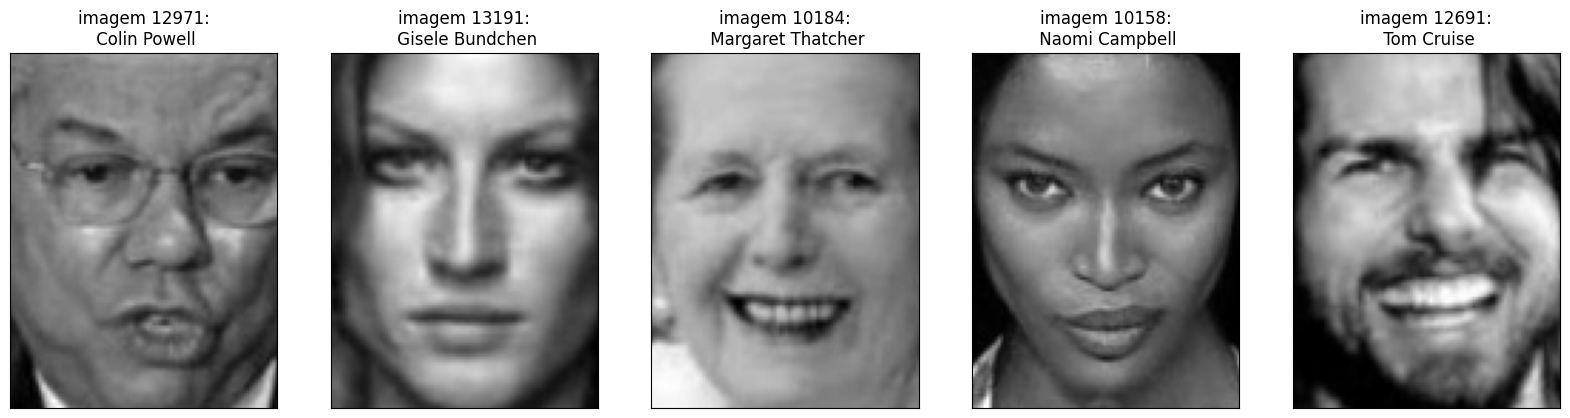

In [29]:
plt.figure(figsize=(20,120))
face_numbers = [1047,1918,3486,4010,5406]
for i in range(len(face_numbers)):
    plt.subplot(1,5,i+1)
    for j in range(len(lfw_people.target)):
      if lfw_people.target[j] == face_numbers[i]:
        plt.imshow(lfw_people.images[j], cmap='gray')
        plt.title('imagem '+str(j)+':\n '+str(target_names[lfw_people.target[j]]))
        plt.xticks(())
        plt.yticks(())
plt.show()

### Fotos reais da turma

Loading das fotos tratadas da turma

In [31]:
# Construa o caminho completo do arquivo
file_path = '/content/drive/MyDrive/AprendizadoMaquinasI/2025/ThisIsMe/Dataset/'

# Verifique se o diretório existe, se não, crie-o
dir_path = os.path.dirname(file_path)
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

In [32]:
# Abrir os arquivos
with open(file_path+'turma_data.pkl', 'rb') as pickle_file:
  turma_data = pk.load(pickle_file)

with open(file_path+'turma_target.pkl', 'rb') as pickle_file:
  turma_target = pk.load(pickle_file)

with open(file_path+'turma_target_names.pkl', 'rb') as pickle_file:
  turma_target_names = pk.load(pickle_file)

In [33]:
turma_data = np.array(turma_data)
turma_target = np.array(turma_target)
print(f'Nossos dados de entrada estão em uma matriz {turma_data.shape} nomeada de turma_data.')
print(f'Nossos dados de saída estão em um vetor {turma_target.shape} nomeado de turma_target.')

Nossos dados de entrada estão em uma matriz (712, 11750) nomeada de turma_data.
Nossos dados de saída estão em um vetor (712,) nomeado de turma_target.


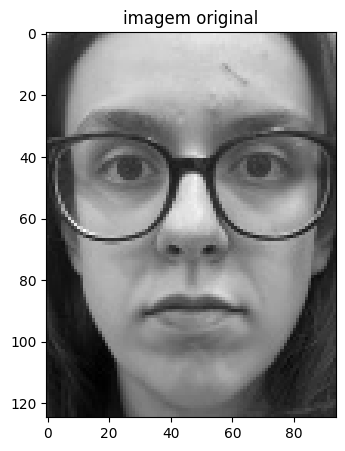

In [36]:
plt.figure(figsize=(5,5))
plt.imshow(turma_data[708].reshape(altura_lfw, largura_lfw), cmap='gray')
plt.title('imagem original')
plt.show()

# <font face="Verdana" size=6 color='#6495ED'> AGORA É COM VOCÊ ...

Seria interessante aplicar PCA para reduzir a dimensão dos pontos de `lfw_people.data` a uma dimensão de `n_PC` componentes retendo-se o *máximo* de informação possível. Verifique, através da plotagem da porcentagem de variação explicada acumulada, qual o valor razoável para `n_PC`. Para encontrar as direções principais, passe o parâmetro `n_components=n_PC` no construtor de `PCA` e crie uma nova decomposição de `lfw_people.data` com o método `fit`.

Depois, os dados projetados no novo espaço de dimensão reduzida são obtidos a partir de pontos no espaço original com o método `transform` (naturalmente aqui há alguma perda de informação).

Para você e seu grupo:

1. Criem o dataset:
 * `data_images` com as imagens da turma adicionadas ao `lfw_people.images`
 * `data` com os dados adicionados à lista `lfw_people.data`
 * `data_target`, acrescente mais números em `lfw_people.target`
 * `data_names`, acrescente os nomes em `lfw_people.target_names`


2. Calculem o PCA;
3. Plotem o gráfico da variância explicada acumulada e, baseando-se no gráfico, escolham um número de componentes principais a ser adotado;
4. Plotem o *rosto médio*. Uma parte interessante do PCA é que ele calcula o *rosto médio*, que pode ser interessante examinar. Isso pode ser calculado com `pca.mean_`. Este rosto mostrará a média para cada dimensão de todas as imagens no conjunto de dados. Portanto, ele efetivamente mostra um rosto MÉDIO refletindo todos os rostos no conjunto de dados.
5. Projetem o  __i-ésimo ponto__ `lfw_people.data[i]` (lembrem-se que os valores devem estar na forma de vetor linha e, portanto, dimensão de $1 \times 11750$ ) nas CPs e os projetem novamente no espaço original. Usem diferentes quantidades de componentes principais `n_PC` e vejam o quanto de informação é perdida para um baixo número de componentes consideradas. Verifiquem também, que a medida que o número de componentes consideradas cresce, a imagem recuperada se aproxima da imagem original. Um ponto do espaço original recuperado pode ser obtido a partir do espaço reduzido com o método `inverse_transform`.
6. Apenas para ilustração, remodelem as componentes principais e definam como `eigenfaces`, que é o nome dado a um conjunto de autovetores quando usado no problema de visão computacional de reconhecimento de rosto humano. Vejam que quando PCA é aplicado a dimensão de cada uma das `n_PC` componentes é de 11750 e, para mostrar a imagem,  devem remodelar o vetor para dimensão de `altura_lfw` ($125$) vs `largura_lfw` ($94$):

`eigenfaces = pca.components_.reshape((n_PC, altura_lfw, largura_lfw))`

7. Plotem as primeiras (20, por exemplo) eigenfaces e resumam suas conclusões.
8. É interessante notar que o espaço das eigenfaces não é útil apenas para representar rostos humanos, mas também pode ser usado para aproximar um cachorro (Fig. `doguito.png`) ou um cappuccino (Fig. `capuccino.png`). Vocês devem testar. Isso é possível porque as 1600 eigenfaces abrangem um grande subespaço do espaço de imagem de 32256 dimensões, correspondendo a características espaciais amplas, suaves e não localizadas, como bochechas, testa, bocas, etc.
9. Salvem os dados do PCA.

In [39]:
# Criação do dataset
data = np.concatenate((lfw_people.data, turma_data), axis=0)
data_target = np.concatenate((lfw_people.target, turma_target), axis=0)
data_names = np.concatenate((lfw_people.target_names, turma_target_names), axis=0)

In [41]:
data.shape

(13945, 11750)

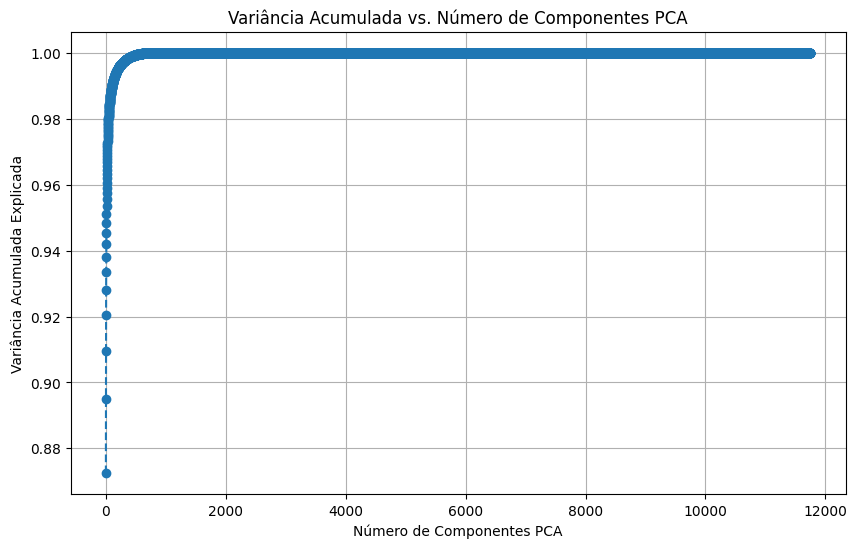

In [40]:
from sklearn.decomposition import PCA
# Aplicar PCA
pca = PCA()
pca.fit(data)

# Calcular a variância acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotar a variância acumulada vs. o número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Acumulada vs. Número de Componentes PCA')
plt.xlabel('Número de Componentes PCA')
plt.ylabel('Variância Acumulada Explicada')
plt.grid(True)
plt.show()

In [56]:
for i, j in enumerate(cumulative_variance):
  if j > 0.99:
    print(f'A partir de {i+1} componentes, mais de {j} da variancia é explicada')
    break

A partir de 102 componentes, mais de 0.9900192022323608 da variancia é explicada


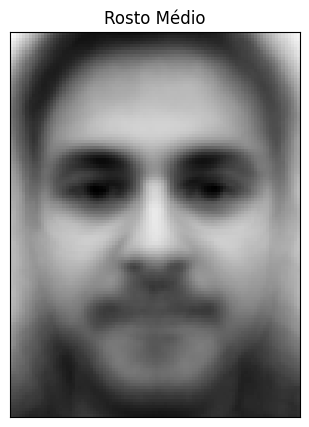

In [58]:
# Plotar o rosto médio
plt.figure(figsize=(5, 5))
plt.imshow(pca.mean_.reshape(altura_lfw, largura_lfw), cmap='gray')
plt.title('Rosto Médio')
plt.xticks(())
plt.yticks(())
plt.show()

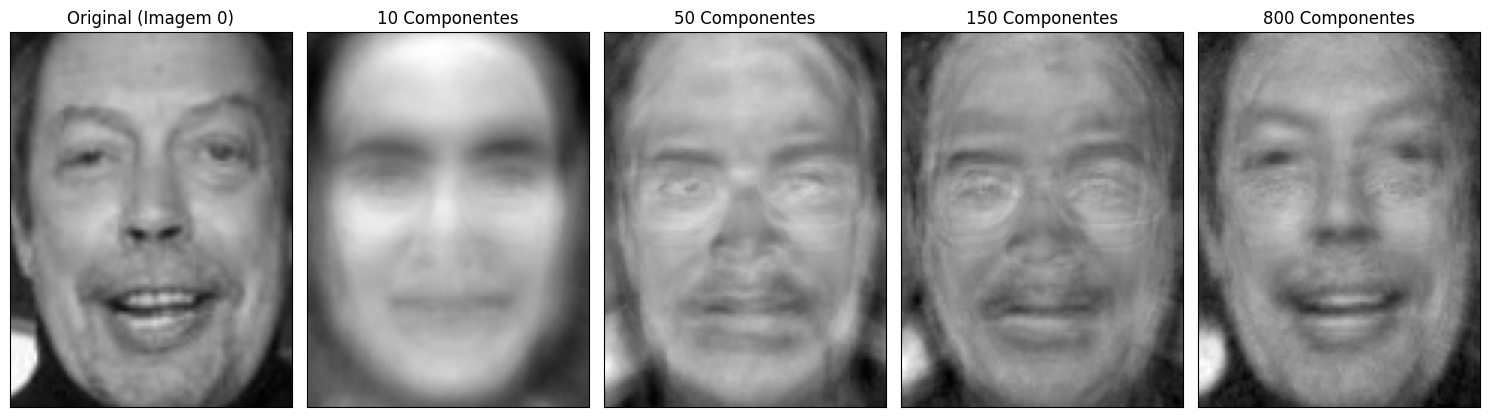

Observações sobre a perda de informação:
Com um baixo número de componentes principais, a imagem reconstruída é mais borrada e menos detalhada.
À medida que o número de componentes principais aumenta, a imagem reconstruída se torna mais nítida e se aproxima mais da imagem original.


In [67]:
# Projetar e reconstruir um ponto usando diferentes números de componentes principais
i = 0  # Índice do ponto a ser projetado e reconstruído (primeira imagem do lfw_people)
point_to_project = lfw_people.data[i].reshape(1, -1) # Certificar-se que é um vetor linha

n_PCs_to_test = [10, 50, 150, 800] # Diferentes quantidades de componentes principais para testar

plt.figure(figsize=(15, 5))
plt.subplot(1, len(n_PCs_to_test) + 1, 1)
plt.imshow(lfw_people.images[i], cmap='gray')
plt.title(f'Original (Imagem {i})')
plt.xticks(())
plt.yticks(())

for j, n_PC in enumerate(n_PCs_to_test):
  # Aplicar PCA com n_PC componentes
  pca_n = PCA(n_components=n_PC)
  pca_n.fit(data)

  # Projetar o ponto no espaço reduzido
  projected_point = pca_n.transform(point_to_project)

  # Projetar o ponto de volta no espaço original
  reconstructed_point = pca_n.inverse_transform(projected_point)

  # Remodelar o ponto reconstruído para exibir como imagem
  reconstructed_image = reconstructed_point.reshape(altura_lfw, largura_lfw)

  # Plotar a imagem reconstruída
  plt.subplot(1, len(n_PCs_to_test) + 1, j + 2)
  plt.imshow(reconstructed_image, cmap='gray')
  plt.title(f'{n_PC} Componentes')
  plt.xticks(())
  plt.yticks(())

plt.tight_layout()
plt.show()

print("Observações sobre a perda de informação:")
print("Com um baixo número de componentes principais, a imagem reconstruída é mais borrada e menos detalhada.")
print("À medida que o número de componentes principais aumenta, a imagem reconstruída se torna mais nítida e se aproxima mais da imagem original.")


In [ ]:
# Remodelar as componentes principais para Eigenfaces
n_PC = 102

# Recalcular PCA com o número escolhido de componentes
pca = PCA(n_components=n_PC)
pca.fit(data)

# Remodelar as componentes principais para ter o formato de imagem
eigenfaces = pca.components_.reshape((n_PC, altura_lfw, largura_lfw))

print(f'As {n_PC} eigenfaces têm dimensão de {altura_lfw}x{largura_lfw}.')

# Plotar as primeiras 20 eigenfaces
n_row = 4
n_col = 5
plt.figure(figsize=(1.5 * n_col, 2 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(min(n_PC, n_row * n_col)):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.xticks(())
    plt.yticks(())

plt.show()

In [ ]:
# Plotar as primeiras 20 eigenfaces
n_row = 4
n_col = 5
plt.figure(figsize=(1.5 * n_col, 2 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(min(n_PC, n_row * n_col)):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.xticks(())
    plt.yticks(())

plt.show()

### **Conclusões sobre as Eigenfaces:**
As eigenfaces representam as principais direções de variação nos dados de rostos. Elas capturam características faciais importantes e recorrentes (bordas, contornos, sombreamentos).

As primeiras eigenfaces geralmente representam as variações mais significativas e amplas. À medida que o índice aumenta, as eigenfaces tendem a capturar detalhes mais finos. Essas componentes formam uma base ortogonal no espaço de rostos e podem ser usadas para reconstruir ou aproximar qualquer rosto no conjunto de dados. Elas demonstram como diferentes partes do rosto variam mais do que outras através do conjunto de dados. Podem ser vistas como 'padrões faciais' ou 'protótipos' que, combinados linearmente, podem gerar outros rostos.

In [ ]:
# Salvar os dados do PCA
# Caminho para salvar os arquivos no Google Drive
save_path = '/content/drive/MyDrive/AprendizadoMaquinasI/2025/PCA_Results/'

# Verifica se o diretório existe, se não, cria
os.makedirs(save_path, exist_ok=True)

# Salvar o objeto PCA treinado (inclui mean_, components_, explained_variance_ratio_)
with open(save_path + 'pca_model.pkl', 'wb') as f:
    pk.dump(pca, f)

# Salvar os dados transformados (os dados projetados no espaço das componentes principais)
# Transformar todos os dados originais (lfw_people + turma) usando o PCA treinado
data_pca = pca.transform(data)

with open(save_path + 'data_pca_transformed.pkl', 'wb') as f:
    pk.dump(data_pca, f)

# Opcional: Salvar a variância explicada e os nomes
with open(save_path + 'cumulative_variance.pkl', 'wb') as f:
    pk.dump(cumulative_variance, f)

# Salvar os nomes dos targets originais (para referência)
with open(save_path + 'data_names.pkl', 'wb') as f:
    pk.dump(data_names, f)


print(f"Dados do PCA salvos em: {save_path}")
print("pca_model.pkl: Objeto PCA treinado")
print("data_pca_transformed.pkl: Dados originais projetados no espaço PCA")
print("cumulative_variance.pkl: Variância explicada acumulada")
print("data_names.pkl: Nomes das pessoas correspondentes aos targets")

# <font face="Verdana" size=6 color='#6495ED'> DESAFIO

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(turma_data, turma_target, test_size=0.2, random_state=42)

In [ ]:
y_train

## Treinamento do Modelo SVM

Você vai criar um classificador por vetores de suporte (*Support Vector Machine* - SVM).

São várias etapas:
* O seu PCA está bom? Você explorou todas as possibilidades?
* Use o dataset de entradas (`turma_data`, imagens) e saídas (`turma_target`, números de 0 ao total de colegas). Além disso, você precisa da lista `turma_target_names`, para depois ligar os nomes aos números de classificação;
* Divida seus dados em treino e teste. Verifique se alguns colegas, que possuem poucas fotos, não ficaram somente em um grupo;
* Treine o modelo SVM, utilizando o `GridSearchCV` para ajuste de hiperperâmetros;
* Analise o desempenho do modelo, plotando, por exemplo, a matriz de confusão.

Ao final da próxima aula, você receberá um notebook onde poderá carregar seu pca:
```
pca = pk.load(open(file_path_pcs+'pca.pkl', 'rb'))
```
e seu modelo será treinado na hora, com o dataset de seus colegas.

A imagem de um colega será capturada pela câmera de seu computador, a face deverá ser identificada via Haar Cascade e, finalmente, você irá utilizar seu algoritmo para reconhecer quem é o colega. Você pode escolher 5 nomes.

```
def tirar_foto(quality=0.8, texto_botao="Capturar"):
  js = Javascript('''
    async function takePhoto(qual, texto) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = texto;
      div.appendChild(capture);

      // Abre a câmera
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // Mostra a saída da câmera
      const video = document.createElement('video');
      video.style.display = 'block';
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;      
      await video.play();
      
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', qual);
    }
    ''')
  display(js)
  return eval_js('takePhoto({}, "{}")'.format(quality, texto_botao))

try:
  imagem_urlb64 = tirar_foto()
  imbytes = b64decode(imagem_urlb64.split(',')[1])
  im = cv2.imdecode(np.frombuffer(imbytes, dtype=np.uint8), flags=1)
  plt.imshow(im, cmap='gray'),plt.title('Imagem capturada')
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
```



In [ ]:
import tensorflow as tf

name = 'Albert_Einstein.jpg'
image_org = cv2.imread(name)  # Carrega no formato BGR (OpenCV padrão)
image_rgb = cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)  # Shape: (altura, largura)

# Adicionar canal para ficar (altura, largura, 1)
image_gray = np.expand_dims(image_gray, axis=-1)  # Novo shape: (altura, largura, 1)
image_gray = image_gray.astype('float32') / 255.0  # Normalizar [0, 1]

# Gerador de aumento para imagens em cinza
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=3.0,
#    brightness_range=[0.8, 1.01],
    fill_mode='nearest'
)

# 6. Gerar exemplos aumentados
augmented_images = []
for _ in range(8):  # Gerar 9 variações
    aug_img = datagen.random_transform(image_gray)
    augmented_images.append(aug_img)

# 7. Plotar resultados
plt.figure(figsize=(12, 10))
plt.suptitle('Data Augmentation em Escala de Cinzas')

# Imagem original em cinza
plt.subplot(3, 3, 1)
plt.imshow(np.squeeze(image_gray), cmap='gray')  # Remove dimensão extra para plot
plt.title('Original')
plt.axis('off')
for idx, aug_img in enumerate(augmented_images, 1):  # Índice começa em 1
    plt.subplot(3, 3, idx + 1)  # +1 porque o subplot 1 já foi usado
    plt.imshow(np.squeeze(aug_img), cmap='gray')
    plt.title(f'Aug {idx}')
    plt.axis('off')

plt.tight_layout()
plt.show()